## CS-E4820 Machine Learning: Advanced Probabilistic Methods (Spring 2023)

Pekka Marttinen, Vishnu Raj, Antti Pöllänen, Nikitin Alexander, Sebastiaan De Peuter, Tommi Gröhn, Julien Martinelli, Ali Khoshvishkaie, Onur Poyraz


## Exercise 5, due on Tuesday March 7 at 23:50.

### Contents
1. Problem 1: EM for missing observations
2. Problem 2: Extension of 'simple example' from the lecture
3. Problem 3: PyTorch

# Problem 1: EM for missing observations
Suppose random variables $X_{i}$ follow a bivariate normal distribution $X_{i}\sim \mathcal{N}_{2}(0,\Sigma)$, where
$ \Sigma = \begin{bmatrix} 1 & \rho\\ \rho & 1 \end{bmatrix} $.

Suppose further that we have observations on $X_{1}=(X_{11},X_{12})^{T}$, $X_{2}=(X_{21},X_{22})^{T}$ and $X_{3}=(X_{31},X_{32})^{T}$, such that
$X_{1}$ and $X_{3}$ are fully observed, and from $X_{2}$ we have observed only
the second coordinate. Thus, our data matrix can be written as

$$
\begin{bmatrix}
x_{11} & x_{12}\\
? & x_{22}\\
x_{31} & x_{32}
\end{bmatrix} 
$$


where the rows correspond to the transposed observations $\mathbf{x}_{1}^{T},\mathbf{x}_{2}^{T},\mathbf{x}_{3}^{T}$. Suppose we want to learn the unknown parameter $\rho$ using the EM-algorithm. Denote the missing observation by $Z$ and derive the E-step of the algorithm, i.e., __(a)__ write the complete data log-likelihood $\ell(\rho)$, __(b)__ compute the posterior distribution of the missing observation, given the observed variables and current estimate for $\rho$, and __(c)__ evaluate the expectation of $\ell(\rho)$ with respect to the posterior distribution of the missing observations.

**Hints**:

1. In general, for $X \sim \mathcal{N}_2(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where $X=(X_1, X_2)^{T}$, $\boldsymbol{\mu}=(\mu_1, \mu_2)^{T}$ and $\boldsymbol{\Sigma} = \begin{pmatrix} 
            \sigma_1^{2} & \rho\sigma_{1}\sigma_{2} \\ 
            \rho\sigma_{1}\sigma_{2} & \sigma_2^{2} 
            \end{pmatrix}$, 
we have 
$$ X_1 \mid X_2 = x_2 \sim \mathcal{N}\left(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1-\rho^2)\sigma_1^{2}\right),$$  with $\rho$ being the correlation coefficient.
2. For evaluating the expectation of $\ell(\rho)$, you can make use of the following two rules: 
    - $\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2} = trace(\boldsymbol{\Sigma}^{-1}\mathbf{x_2x_2^T}).$
    - if $X \sim \mathcal{N}(\mu, \sigma^2)$ then $\langle{X^2}\rangle = \mu^2 + \sigma^2$.




YOUR ANSWER HERE

__(a)__ write the complete data log-likelihood $\ell(\rho)$

Complete data refers to a data that contains all the information that is needed to perform a statistical analysis. This means that every observation in the data set has values for all the variables of interest, and there are no missing variables. Therefore, the complete data log likelihood of $\mathbf{x}$ based on $\rho$ is:

$\ell(\rho) = \sum^3_{i=1} \log p(\textbf{x}_i|\rho)$, where $\mathbf{x}_2$ is treated as complete instead of missing


$=> \ell(\rho) = \sum^3_{i=1} 
\log \left(
\dfrac{1}{\sqrt{\det(2 \pi \boldsymbol{\Sigma})}} \exp\left(-\dfrac{1}{2}(\mathbf{x}_i - \mu)^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}_i - \mu)\right)
\right)$

$=> \ell(\rho) = \sum^3_{i=1} 
\log \left(
\det(2 \pi \boldsymbol{\Sigma})^{-\frac{1}{2}} \exp\left(-\dfrac{1}{2}(\mathbf{x}_i - 0)^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}_i - 0)\right)
\right)$

$=> \ell(\rho) = \sum^3_{i=1} 
\log \left(\det(2 \pi \boldsymbol{\Sigma})^{-\frac{1}{2}}\right)
+ \log \exp \left(-\dfrac{1}{2}\mathbf{x}_i^T \boldsymbol{\Sigma}^{-1} \mathbf{x}_i\right)
$

$=> \ell(\rho) = \sum^3_{i=1} 
\left({-\dfrac{1}{2}} \log \left(\det(2 \pi \boldsymbol{\Sigma})\right)
 -\dfrac{1}{2}\mathbf{x}_i^T \boldsymbol{\Sigma}^{-1} \mathbf{x}_i\right)
$

Observing that the term $-\dfrac{1}{2} \log (\det(2 \pi \boldsymbol{\Sigma}))$ is independent of $\mathbf{x}_i$, so the log likelihood can be rephrased as:

$=> \ell(\rho)  = -\dfrac{3}{2} \log \det (2 \pi \boldsymbol{\Sigma}) - \sum\limits^3_{i=1} \dfrac{1}{2} \mathbf{x}_i^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_i$ (answer), where $\boldsymbol{\Sigma}$ is a matrix dependent of $\rho$



__(b)__ compute the posterior distribution of the missing observation, given the observed variables and current estimate for $\rho$

According to the hint, for $X \sim \mathcal{N}_2(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where $X=(X_1, X_2)^{T}$, $\boldsymbol{\mu}=(\mu_1, \mu_2)^{T}$ and $\boldsymbol{\Sigma} = \begin{pmatrix} 
            \sigma_1^{2} & \rho\sigma_{1}\sigma_{2} \\ 
            \rho\sigma_{1}\sigma_{2} & \sigma_2^{2} 
            \end{pmatrix}$, 
we have 
$$ X_1 \mid X_2 = x_2 \sim \mathcal{N}\left(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1-\rho^2)\sigma_1^{2}\right),$$  with $\rho$ being the correlation coefficient.

Additionally, we know that $X_{i}\sim \mathcal{N}_{2}(0,\Sigma)$, where $\Sigma = \begin{bmatrix} 1 & \rho\\ \rho & 1 \end{bmatrix}$, which means that $\mu_1 = 0, \mu_2 = 0, \sigma_1 = 1, \sigma_2 = 1$. Therefore, the posterior of the unknown variable Z with respect to the 2nd element of the 2nd datapoint, $X_{22}$, is given by

$p(Z|X_{22} = x_{22}) \sim \mathcal{N}\left(\mu_1 + \dfrac{\sigma_1}{\sigma_2}\rho_c(x_{22}-\mu_2), (1-\rho_c^2)\sigma_1^{2}\right)$

$=> p(Z|X_{22} = x_{22}) \sim \mathcal{N}\left(0 + \dfrac{1}{1}\rho_c(x_{22}-0), (1-\rho_c^2)1^{2}\right)$

$=> p(Z|X_{22} = x_{22}) \sim \mathcal{N}\left(\rho_c x_{22}, 1-\rho_c^2\right)$ (answer), where $\rho_c$ is the current estimate of the correlation coefficient

__(c)__ Evaluate the expectation of $\ell(\rho)$ with respect to the posterior distribution of the missing observations.

The expectation of the log likelihood with respect to the posterior distribution of Z is:

$\langle{\ell(\rho)}\rangle = 
\left\langle{-\dfrac{3}{2} \log \det (2 \pi \boldsymbol{\Sigma}) - \sum\limits^3_{i=1} \dfrac{1}{2} \mathbf{x}_i^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_i}\right\rangle$ (result from part (a))

Because only $\mathbf{x}_2$ contains Z, it means the expectation will treat other terms as constant, which looks like this:
$\langle{\ell(\rho)}\rangle = -\dfrac{3}{2} \log \det (2 \pi \boldsymbol{\Sigma})
- \dfrac{1}{2} \mathbf{x}_1^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_1
- \dfrac{1}{2} \left\langle{ \mathbf{x}_2^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_2}\right\rangle
- \dfrac{1}{2} \mathbf{x}_3^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_3
$

Therefore, let's focus on calculating only $\left\langle{ \mathbf{x}_2^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_2}\right\rangle$, and when we obtain the result, we will plug it into this formula again

According to one hint, we have $\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2} = trace(\boldsymbol{\Sigma}^{-1}\mathbf{x_2x_2^T}).$

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = \left\langle{ trace(\boldsymbol{\Sigma}^{-1}\mathbf{x_2x_2^T})}\right\rangle$, where we can move terms independent of $x_2$ outside the expectation

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = trace\left(\boldsymbol{\Sigma}^{-1}\left\langle{\mathbf{x_2x_2^T}}\right\rangle \right)$

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = trace\left(\boldsymbol{\Sigma}^{-1}\left\langle{\begin{bmatrix} Z \\ x_{22} \end{bmatrix} \begin{bmatrix} Z & x_{22} \end{bmatrix}}\right\rangle \right)$

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = trace\left(\boldsymbol{\Sigma}^{-1}\left\langle{\begin{bmatrix} Z^2 & Zx_{22} \\ Zx_{22} & x_{22}^2 \end{bmatrix}}\right\rangle \right)$

Another given hint is that if $X \sim \mathcal{N}(\mu, \sigma^2)$ then $\langle{X^2}\rangle = \mu^2 + \sigma^2$. From part (b), we know that $p(Z|X_{22} = x_{22}) \sim \mathcal{N}\left(\rho_c x_{22}, 1-\rho_c^2\right)$

=> $\langle{Z^2}\rangle = (\rho_c x_{22})^2 + (1-\rho_c^2)$ and $\langle{Z}\rangle = \rho_c x_{22}$. Replace these into the trace equation, the new formula without expectation is derived as:


=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = trace\left(\begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}^{-1}\begin{bmatrix} (\rho_c x_{22})^2 + (1-\rho_c^2) & \rho_c x_{22}^2 \\ \rho_c x_{22}^2 & x_{22}^2 \end{bmatrix} \right)$

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = trace\left(
\begin{bmatrix} \dfrac{1}{1 - \rho^2} & -\dfrac{\rho}{1 - \rho^2} \\ -\dfrac{\rho}{1 - \rho^2} & \dfrac{1}{1 - \rho^2} \end{bmatrix}
\begin{bmatrix} (\rho_c x_{22})^2 + (1-\rho_c^2) & \rho_c x_{22}^2 \\ \rho_c x_{22}^2 & x_{22}^2 \end{bmatrix} \right)$

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = trace\left(
\dfrac{1}{1-\rho^2}
\begin{bmatrix} 1 & -\rho \\ \rho & 1 \end{bmatrix}
\begin{bmatrix} (\rho_c x_{22})^2 + (1-\rho_c^2) & \rho_c x_{22}^2 \\ \rho_c x_{22}^2 & x_{22}^2 \end{bmatrix} \right)$

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = trace\left(\dfrac{\rho_c^2 x_{22}^2 + (1-\rho_c^2) - 2 \rho \rho_c x_{22}^2 + x_{22}^2}{1- \rho^2}\right)$

Since the whole fraction is scalar, the trace of a scalar is the scalar itself, which means we can remove the trace function. The expectation result is 

=> $\left\langle{\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2}}\right\rangle = \dfrac{\rho_c^2 x_{22}^2 + (1-\rho_c^2) - 2 \rho \rho_c x_{22}^2 + x_{22}^2}{1- \rho^2}$ 

Finally, the expectation of the complete data log likelihood with respect to the posterior distribution of Z is given by: 

$\langle{\ell(\rho)}\rangle = -\dfrac{3}{2} \log \det (2 \pi \boldsymbol{\Sigma})
\dfrac{1}{2} \mathbf{x}_1^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_1
\dfrac{1}{2} \dfrac{\rho_c^2 x_{22}^2 + (1-\rho_c^2) - 2 \rho \rho_c x_{22}^2 + x_{22}^2}{1- \rho^2}
\dfrac{1}{2} \mathbf{x}_3^T \boldsymbol{\Sigma}^{-1}\mathbf{x}_3
$ (answer)

# Problem 2: Extension of 'simple example' from the lecture
Suppose that we have $N$ independent observations $x = ( x_1, \dots, x_N )$ from a two-component mixture of univariate Gaussian distributions with unknown mixing co-efficients and unknown mean of the second component:
$$ p(x_{n} \mid \theta,\tau)=(1-\tau)\mathcal{N}(x_{n}|0,1)+\tau\mathcal{N}(x_{n} \mid \theta,1).$$

**(a)** Write down the complete data log-likelihood and derive the EM-algorithm for learning the maximum likelihood estimates for $\theta$ and $\tau$. 

**(b)** Simulate some data from the model ($N = 100$ samples) with the true values of parameters $\theta$ = 3 and $\tau = 0.5$. Run your EM algorithm to see whether the learned parameters converge close to the true values (by e.g. just listing the estimates from a few iterations or plotting them). Use the code template below (after the answer cell) as a starting point. 

**HINT**: The E and M steps for simple example.pdf from the lecture material looks as follows
```Python
	# E-step: compute the responsibilities r2 for component 2
	r1_unnorm = scipy.stats.norm.pdf(x, 0, 1)
	r2_unnorm = scipy.stats.norm.pdf(x, theta_0, 1)
	r2 = r2_unnorm / (r1_unnorm + r2_unnorm)
	
	# M-step: compute the parameter value that maximizes
	# the expectation of the complete-data log-likelihood.
	theta[it] = sum(r2 * x) / sum(r2)
```






Write your answer to Problem 2(a) here

**(a)** Write down the complete data log-likelihood

The complete data log-likelihood is the joint log likelihood of both the observed variable, $\mathbf{x}$ and the latent variable, $\mathbf{z}$. The log-likelihood formula is:

$\log p(\mathbf{x}, \mathbf{z} | \theta, \tau) = \log \left\{\prod\limits^N_{n=1} p(x_n, z_n| \theta, \tau) \right\} = \sum^N_{n=1} \log p(x_n, z_n | \theta, \tau)$

=> $\log p(\mathbf{x}, \mathbf{z} | \theta, \tau) = \sum^N_{n=1} \log \left(p(x_n | z_n, \theta) p(z_n | \tau)\right) = \sum^N_{n=1} \log \left((1-\tau)^{z_{n1}} \mathcal{N}(x_n|0,1)^{z_{n1}} \times  (1-\tau)^{z_{n2}} \mathcal{N}(x_n|\theta,1)^{z_{n2}}  \right)$

=> $\log p(\mathbf{x}, \mathbf{z} | \theta, \tau) = \sum^N_{n=1} \left( z_{n1}\log(1-\tau) + z_{n1} \log \mathcal{N}(x_n|0,1)+ z_{n2} \log \tau + z_{n2} \log \mathcal{N}(x_n|\theta, 1) \right)$ (E.q 1) (answer)

Derive the EM-algorithm for learning the maximum likelihood estimates for $\theta$ and $\tau$

#### E-step $1^0$
Compute the posterior distribution of the latent variables, given the
current estimate $\theta_0$ of $\theta$:

$p(z_{n1} = 1|x_n,\theta_0, \tau_0) \propto p(z_{n1}=1)p(x_n|z_n, \theta_0, \tau_0) = (1 - \tau_0) \mathcal{N}(x_n|0,1)$ (E.q 2)

$p(z_{n2} = 1|x_n,\theta_0, \tau_0) \propto p(z_{n2}=1)p(x_n|z_n, \theta_0, \tau_0) =  \tau_0 \mathcal{N}(x_n | \theta_0, 1) $ (E.q 3)

By normalizing these two equations E.q 2 and E.q 3, we get:

$ \gamma(z_{n2}) = p(z_{n2} = 1|x_n,\theta_0) \propto \dfrac{\tau_0 \mathcal{N}(x_n | \theta_0, 1)}
{\tau_0 \mathcal{N}(x_n | \theta_0, 1) + (1 - \tau_0) \mathcal{N}(x_n | 0, 1)}$ (E.q 4)

#### E-step $2^0$
Evaluate the expectation of the complete data log-likelihood over the posterior distribution of the latent variables in E.q 4

$\mathcal{Q}(\theta, \tau|\theta_0, \tau_0) = E_{z|x,\theta_0, \tau_0} [\log p(\mathbf{x},\mathbf{z}|\theta,\tau))]$

$=> \mathcal{Q}(\theta, \tau|\theta_0, \tau_0) = \sum^N_{n=1} \{ 
E[z_{n1}] \log[(1 - \tau) \mathcal{N}(x_n|0,1)] + E[z_{n2}] \log [\tau \mathcal{N}(x_n|\theta, 1)]
\}$

$=> \mathcal{Q}(\theta, \tau|\theta_0, \tau_0) = \sum^N_{n=1} \gamma(z_{n1})\log(1-\tau) + \gamma(z_{n1}) \log \mathcal{N}(x_n|0,1)+ \gamma(z_{n2}) \log \tau + \gamma(z_{n2}) \log \mathcal{N}(x_n|\theta, 1)$ (answer)

#### M-step

Maximize $\mathcal{Q}(\theta; \theta_0)$ with respect to $\theta$. To differentiate $\mathcal{Q}(\theta; \theta_0)$, the following result can be verified by straightforward computation

$\dfrac{d}{d\theta} \mathcal{N}(x_n|\theta,1)=\mathcal{N}(x_n|\theta,1)(x_n-\theta)$

Setting $\dfrac{d}{d\theta}\mathcal{Q}(\theta; \theta_0)=0 $, we get the result for $\theta$ 

$$\theta = \dfrac{1}{N_2} \sum^N_{n=1} \gamma(z_{n2})x_n \text{(answer)}$$

where we have defined $N_2 = \sum^N_{n=1} \gamma(z_{n2})$; which can be interpreted as the
effective number of observations assigned to the component 2. Similarly, we can also define  $N_1 = \sum^N_{n=1} \gamma(z_{n1})$ for the first component

Maximizing for $\tau$:

$\dfrac{d}{d\tau} \mathcal{Q}(\tau; \tau_0) = \sum_n \left[\dfrac{\gamma(z_{n2})}{\tau} - \dfrac{\gamma(z_{n1})}{1 - \tau}    \right] = \dfrac{N_2}{\tau} - \dfrac{N_1}{1-\tau} = 0,$

$\dfrac{d}{d\tau} \mathcal{Q}(\tau; \tau_0) = \dfrac{d}{d\tau} \sum^N_{n=1} \gamma(z_{n1})\log(1-\tau) + \gamma(z_{n1}) \log \mathcal{N}(x_n|0,1)+ \gamma(z_{n2}) \log \tau + \gamma(z_{n2}) \log \mathcal{N}(x_n|\theta, 1)$

$\dfrac{d}{d\tau} \mathcal{Q}(\tau; \tau_0) = \sum^N_{n=1} - \dfrac{\gamma(z_{n1})}{1 - \tau} + 0 + \dfrac{\gamma(z_{n2})}{\tau} + 0  = \sum^N_{n=1} - \dfrac{\gamma(z_{n1})}{1 - \tau} + \dfrac{\gamma(z_{n2})}{\tau} = - \dfrac{N_1}{1-\tau} + \dfrac{N_2}{\tau} $

Setting $\dfrac{d}{d\tau} \mathcal{Q}(\tau; \tau_0) = 0$, we get the result for $\tau$ 

$$- \dfrac{N_1}{1-\tau} + \dfrac{N_2}{\tau} = 0 => \tau = \dfrac{N_2}{N_1+N_2} \text{ (answer)}$$

theta       tau
1.0000000  0.1000000
3.2393002  0.3798055
3.2787207  0.5396835
3.2208416  0.5618515
3.2012856  0.5684228
3.1949151  0.5705275
3.1928396  0.5712102
3.1921631  0.5714324
3.1919426  0.5715048
3.1918707  0.5715284
3.1918472  0.5715361
3.1918396  0.5715386
3.1918371  0.5715394
3.1918363  0.5715397
3.1918360  0.5715397
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398


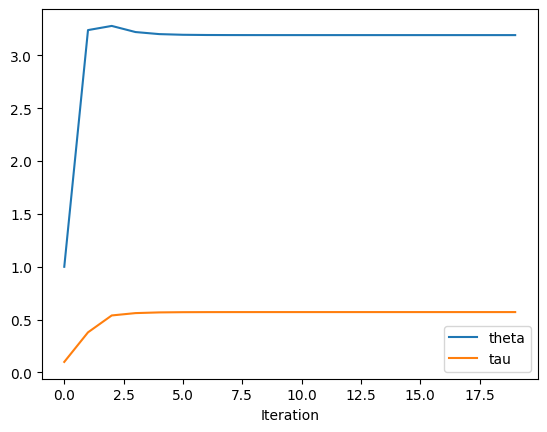

In [1]:
# template for Problem 2(b)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


### Simulate data:

np.random.seed(0)

theta_true = 3
tau_true = 0.5
n_samples = 100

x = np.zeros(n_samples)
for i in range(n_samples):
    # Sample from N(0,1) or N(theta_true,1)
    if np.random.rand() < 1 - tau_true:
        x[i] = np.random.normal(0, 1)
    else:
        x[i] = np.random.normal(theta_true, 1)


### The EM algorithm:

n_iter = 20
theta = np.zeros(n_iter)
tau = np.zeros(n_iter)

# Initial guesses for theta and tau
theta[0] = 1
tau[0] = 0.1

for it in range(1, n_iter):
    # The current estimates for theta and tau,
    # computed in the previous iteration
    theta_0 = theta[it-1]
    tau_0 = tau[it-1]

    # E-step: compute the responsibilities r1 and r2
    # r1 = ?
    # r2 = ?
    
    p_zn1_equals_1 = (1 - tau_0) * scipy.stats.norm.pdf(x, 0, 1)
    p_zn2_equals_1 = tau_0 * scipy.stats.norm.pdf(x, theta_0, 1)
    # This is gamma(z_n2)
    r2 = p_zn2_equals_1 / (p_zn1_equals_1 + p_zn2_equals_1)
    # This is gamma(z_n2)
    r1 = 1 - r2

    # YOUR CODE HERE
    # raise NotImplementedError()

    # M-step: compute the parameter values that maximize
    # the expectation of the complete-data log-likelihood.
    # theta[it] = ?
    # tau[it] = ?
    N1 = np.sum(r1)
    N2 = np.sum(r2)
    theta[it] = np.sum(r2*x) / N2
    tau[it] = N2/(N1+N2)
    # YOUR CODE HERE
    #raise NotImplementedError()
    

# Print and plot the values of theta and tau in each iteration
print("theta       tau")
for theta_i, tau_i in zip(theta, tau):
    print("{0:.7f}  {1:.7f}".format(theta_i, tau_i))

plt.plot(range(n_iter), theta, label = 'theta')
plt.plot(range(n_iter), tau, label = 'tau')
plt.xlabel('Iteration')
plt.legend()
plt.show()

### Problem 3: PyTorch
Go through the PyTorch tutorials in the three links and answer the questions given below

1) What is PyTorch: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

2) Autograd: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

3) Linear regression with PyTorch: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py

__(a)__ What are PyTorch Tensors and how do you run a CPU tensor on GPU? 


__(b)__ What is Automatic differentiation and autograd? 


__(c)__ PyTorch constructs the computation graph dynamically as the operations are defined. In the 'linear regression with PyTorch' tutorial which line numbers indicates the completion of the computation graph, computation of the gradients and update of the weights, respectively? 



Write your answer to Problem 3 here.

(a) PyTorch Tensors are multi-dimensional arrays with support for efficient scientific computing operations. They are similar to NumPy arrays, but it can also utilize the graphics processing units (GPUs) for faster computation. PyTorch Tensors can also be used for automatic differentiation, which is essential for training neural networks using techniques such as backpropagation. PyTorch tensors come in different data types such as float, double, and int. Additionally, they can be initialized from existing data sources such as NumPy arrays or Python lists. 

To run a CPU tensor on GPU in PyTorch, there are several methods:

PyTorch provides a simple to use API to transfer the tensor generated on CPU to GPU, which is the .to(device) method, where device is the hardware that Pytorch runs on
> device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
> X_train = X_train.to(device)

Or we can also set the device parameter in the tensor initialization
> device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
> X_train = torch.FloatTensor([0., 1., 2.], device = device)

In PyTorch, the torch.cuda package has additional support for CUDA tensor types that implement the same function as CPU tensors, but they utilize GPUs for computation.
If we want a tensor to be on GPU, we can call .cuda().
> X_train = torch.FloatTensor([0., 1., 2.])
> X_train = X_train.cuda() 

(b) Automatic differentiation is a technique used in optimization mathematics and machine learning for efficiently computing the derivatives of functions defined by computer programs. It is particularly useful for computing gradients, which are used in optimization algorithms such as stochastic gradient descent (SGD) for training machine learning models.

Autograd is a package in PyTorch that provides automatic differentiation technique mentioned above. It allows computation of gradients of tensor-valued functions of tensors without the need for explicit differentiation rules or formulas. Autograd works by building a computational graph of the operations performed on the input tensors and then using the chain rule of differentiation to compute the gradients of the output with respect to the inputs.

(c) 
In the 'linear regression with PyTorch' tutorial, the line number indicating the completion of the computation graph is at line 37, while the computation of the gradients is line 41 and update of the weights is on line 42 